# HOMEWORK PART 3

For the Lorenz equations, consider the following.

1. Train a NN to advance the solution from $t$ to $t + \Delta t$ for $\rho$ = 10,28 and 35. Now see how well your NN works for future state prediction for $\rho$ = 17 and $\rho$ = 40

Let's consider the Lorentz system of Equations:

\begin{gather*}
x' = \sigma (y - x) \\
y' = x (r - z) -y \\
z' = xy -bz
\end{gather*}

In [28]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

from tensorflow import keras

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K

from sklearn.model_selection import train_test_split

from Utility.Lorenz import lorenz_deriv

integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA' # Probably works also with 'RK45' LSODA well suited for cahotic systems
integrator_keywords['atol'] = 1e-12

plt.style.use('science')

In [35]:
dt = 0.01
T = 8
t = np.arange(0, T+dt, dt)
beta = 8/3
sigma = 10
rho = [10, 28, 35]

nn_input_10 = np.zeros((100*(len(t)-1),3))
nn_input_28 = np.zeros((100*(len(t)-1),3))
nn_input_35 = np.zeros((100*(len(t)-1),3))

nn_output_10 = np.zeros_like(nn_input_10)
nn_output_28 = np.zeros_like(nn_input_28)
nn_output_35 = np.zeros_like(nn_input_35)

x0 = -15 + 30 * np.random.random((100, 3))

x_t_10 = np.asarray([solve_ivp(lorenz_deriv,
                    [t[0], t[-1]],
                    x0_j,
                    t_eval = t,
                    args=(sigma, beta, rho[0]),
                    **integrator_keywords).y.T for x0_j in x0])

x_t_28 = np.asarray([solve_ivp(lorenz_deriv,
                    [t[0], t[-1]],
                    x0_j,
                    t_eval = t,
                    args=(sigma, beta, rho[1]),
                    **integrator_keywords).y.T for x0_j in x0])

x_t_35 = np.asarray([solve_ivp(lorenz_deriv,
                    [t[0], t[-1]],
                    x0_j,
                    t_eval = t,
                    args=(sigma, beta, rho[2]),
                    **integrator_keywords).y.T for x0_j in x0])

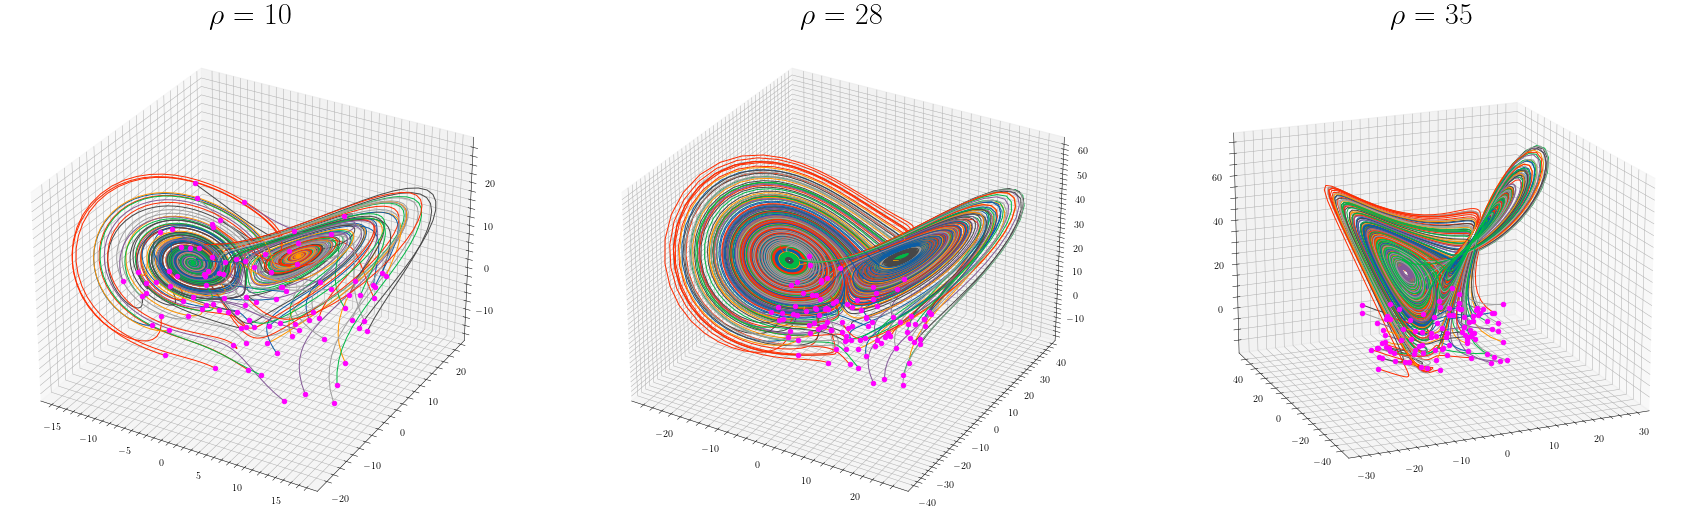

In [48]:
fig= plt.figure(figsize=(30, 15))

ax = fig.add_subplot(1,3,1, projection='3d')
for j in range(100):

    x10, y10, z10 = x_t_10[j, :, :].T
    ax.set_title('$\\rho$ = 10', fontsize = 30)
    ax.plot(x10, y10, z10,linewidth=1)
    ax.scatter3D(x0[j,0],x0[j,1],x0[j,2],color='magenta')

    nn_input_10[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_10[j,:-1,:]
    nn_output_10[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_10[j,1:,:]

ax = fig.add_subplot(1,3,2, projection='3d')
for j in range(100):
    
    x28, y28, z28 = x_t_28[j, :, :].T
    ax.set_title('$\\rho$ = 28', fontsize = 30)
    ax.plot(x28, y28, z28,linewidth=1)
    ax.scatter3D(x0[j,0],x0[j,1],x0[j,2],color='magenta')

    nn_input_28[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_28[j,:-1,:]
    nn_output_28[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_28[j,1:,:]

ax = fig.add_subplot(1,3,3, projection='3d')
for j in range(100):
    
    x35, y35, z35 = x_t_35[j, :, :].T
    ax.set_title('$\\rho$ = 35', fontsize = 30)
    ax.plot(x35, y35, z35,linewidth=1)
    ax.scatter3D(x0[j,0],x0[j,1],x0[j,2],color='magenta')

    nn_input_35[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_35[j,:-1,:]
    nn_output_35[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t_35[j,1:,:]
    
ax.view_init(18, -113)
plt.show()

## Building the first Neural Network

In [51]:
# Build model
deep_approx = keras.models.Sequential()
deep_approx.add(layers.Dense(10, input_dim=3, activation='sigmoid'))
deep_approx.add(layers.Dense(10, activation='relu'))
deep_approx.add(layers.Dense(3, activation='linear'))

# Compile model
deep_approx.compile(loss='mse', optimizer='adam')

# Fit!
History = deep_approx.fit(nn_input_10, nn_output_10, epochs=1000) 

Epoch 1/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 5.0904
Epoch 2/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4976
Epoch 3/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.1322
Epoch 4/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0466
Epoch 5/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0234
Epoch 6/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0147
Epoch 7/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0110
Epoch 8/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0089
Epoch 9/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0075
Epoch 10/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0062
Epoch 11/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0055
Epoch 12/1000
2500/2500 [==============================] - 3s 1

In [ ]:
num_traj = 3

nn_flow_10 = np.zeros((num_traj, len(t), 3))
nn_flow_10[:, 0, :] = -15 + 30 * np.random.random((num_traj, 3))
for jj, tval in enumerate(t[:-1]):
  nn_flow_10[:, jj+1, :] = deep_approx.predict(nn_flow_10[:, jj, :])

In [ ]:
# Build model
deep_approx = keras.models.Sequential()
deep_approx.add(layers.Dense(10, input_dim=3, activation='sigmoid'))
deep_approx.add(layers.Dense(10, activation='relu'))
deep_approx.add(layers.Dense(3, activation='linear'))

# Compile model
deep_approx.compile(loss='mse', optimizer='adam')

# Fit!
History = deep_approx.fit(nn_input_28, nn_output_28, epochs=1000) 

Epoch 1/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 44.4812
Epoch 2/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 2.2304
Epoch 3/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.9118
Epoch 4/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4677
Epoch 5/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2882
Epoch 6/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1918
Epoch 7/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1376
Epoch 8/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1028
Epoch 9/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0796
Epoch 10/1000
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0632
Epoch 11/1000
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0527
Epoch 12/1000
2500/2500 [==============================] - 5s 

KeyboardInterrupt: 

In [ ]:
num_traj = 3

nn_flow_28 = np.zeros((num_traj, len(t), 3))
nn_flow_28[:, 0, :] = -15 + 30 * np.random.random((num_traj, 3))
for jj, tval in enumerate(t[:-1]):
  nn_flow_28[:, jj+1, :] = deep_approx.predict(nn_flow_28[:, jj, :])

In [ ]:
# Build model
deep_approx = keras.models.Sequential()
deep_approx.add(layers.Dense(10, input_dim=3, activation='sigmoid'))
deep_approx.add(layers.Dense(10, activation='relu'))
deep_approx.add(layers.Dense(3, activation='linear'))

# Compile model
deep_approx.compile(loss='mse', optimizer='adam')

# Fit!
History = deep_approx.fit(nn_input_35, nn_output_35, epochs=1000) 

In [ ]:
num_traj = 3

nn_flow_35 = np.zeros((num_traj, len(t), 3))
nn_flow_35[:, 0, :] = -15 + 30 * np.random.random((num_traj, 3))
for jj, tval in enumerate(t[:-1]):
  nn_flow_35[:, jj+1, :] = deep_approx.predict(nn_flow_35[:, jj, :])